In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
kyphosis = pd.read_csv("files/kyphosis.csv")

kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [8]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## visualizatoin

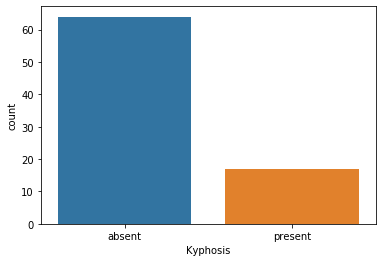

In [14]:
sns.countplot(kyphosis["Kyphosis"], label = "Count")

#### converting strings into `Numbers`

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_y = LabelEncoder()

## turning the strings into numbers
kyphosis["Kyphosis"] = label_encoder_y.fit_transform(kyphosis["Kyphosis"])

In [19]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [24]:
kyphosis_false = kyphosis[kyphosis["Kyphosis"] == 0]

In [26]:
kyphosis_false.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [37]:
print("Not Affected by Kyphosis even after operation", "%",(len(kyphosis_false)/len(kyphosis)) * 100)

Not Affected by Kyphosis even after operation % 79.01234567901234


In [38]:
kyphosis_true = kyphosis[kyphosis["Kyphosis"] == 1]

In [39]:
kyphosis_false.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [42]:
print("Affected by Kyphosis" ,"%", (len(kyphosis_true)/len(kyphosis)) * 100)

Affected by Kyphosis % 20.98765432098765


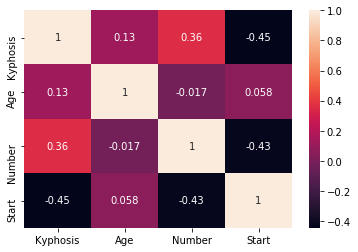

In [43]:
sns.heatmap(kyphosis.corr(), annot=True)

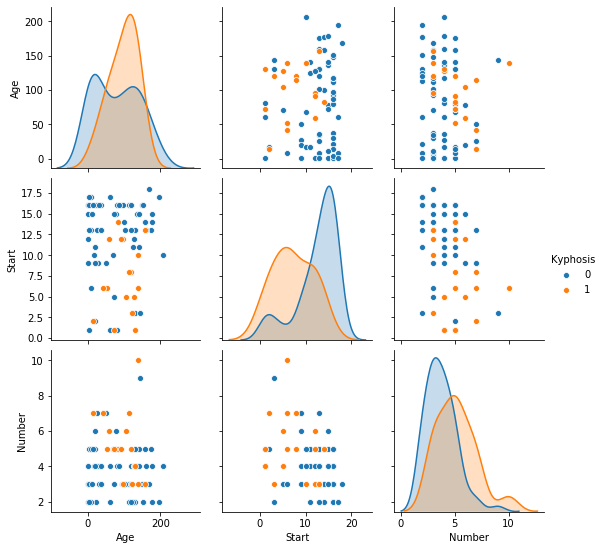

In [46]:
sns.pairplot(kyphosis, hue="Kyphosis", vars=["Age", "Start","Number"])

In [48]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


## let's build our model for this problem

In [49]:
X = kyphosis.drop(["Kyphosis"], axis=1)

In [50]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [51]:
y = kyphosis["Kyphosis"]

In [52]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state = 42, test_size = 0.3)

In [57]:
X_train.shape

(56, 3)

In [56]:
y_train.shape

(56,)

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Let's evaluate the model

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
y_predict_test = decision_tree.predict(X_test)

In [61]:
y_predict_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [65]:
## confusion metrics
cm = confusion_matrix(y_test,y_predict_test)

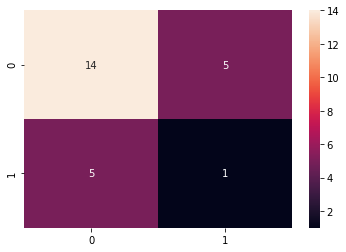

In [66]:
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.17      0.17      0.17         6

    accuracy                           0.60        25
   macro avg       0.45      0.45      0.45        25
weighted avg       0.60      0.60      0.60        25



## RandomForrest

In [70]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_predict_test = randomforest. predict(X_test)

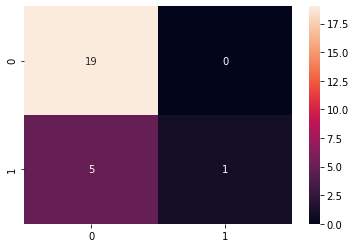

In [72]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [73]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

